In [1]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [2]:
# 導入函式庫
import numpy as np  
import keras

In [3]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
#(X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# model.add(Dense(units=64, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=1)  

print(model.summary())


Epoch 1/10
60/60 [==============================] - 2s 22ms/step - loss: 0.7762 - accuracy: 0.8048 - val_loss: 0.3185 - val_accuracy: 0.9112
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2936 - accuracy: 0.9171 - val_loss: 0.2416 - val_accuracy: 0.9345
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 0.2286 - accuracy: 0.9361 - val_loss: 0.1992 - val_accuracy: 0.9459
Epoch 4/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1882 - accuracy: 0.9469 - val_loss: 0.1715 - val_accuracy: 0.9532
Epoch 5/10
60/60 [==============================] - 1s 20ms/step - loss: 0.1591 - accuracy: 0.9557 - val_loss: 0.1542 - val_accuracy: 0.9584
Epoch 6/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1371 - accuracy: 0.9621 - val_loss: 0.1401 - val_accuracy: 0.9608
Epoch 7/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1195 - accuracy: 0.9676 - val_loss: 0.1294 - val_accuracy: 0.9628
Epoch 8/10
60

In [4]:

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9692

	[Info] Accuracy of testing data = 96.9%


prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
0:01:48.670077


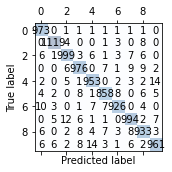

config =  {'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, '

In [10]:

# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis=1)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

# # 顯示錯誤的資料圖像
# X2 = X_test[8,:,:]
# plt.imshow(X2.reshape(28,28))
# plt.show() 


# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)

print(datetime.now()-start)

    
# 模型訓練結果存檔
model.save_weights("model.weight")

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()



# 取得模型組態
print("config = ", model.get_config())
# 取得模型所有權重
print("weights = ", model.get_weights())
# 取得模型彙總資訊
print("summary = ", model.summary())
# 取得網路層資訊
print("layer = ", model.get_layer(index=1).name)
# 取得參數總數
print("params = ", model.count_params())

#from keras.utils import plot_model
#plot_model(model, to_file='model.png')
